<a href="https://colab.research.google.com/github/Muhammad-Ahtasham/Learnings/blob/master/FlowerClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
data_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15184419268_7230e9728e.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/4505921907_21c8002fde.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/8096324039_4db2555490.jpg')]

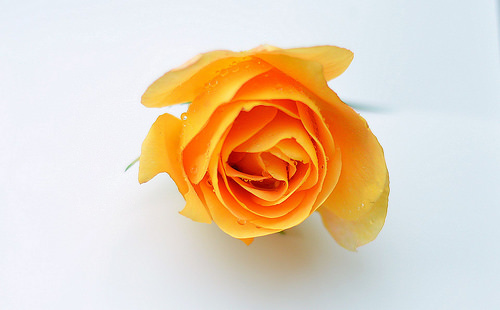

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

array([[[213, 232, 240],
        [210, 229, 236],
        [208, 227, 234],
        ...,
        [139, 146, 166],
        [136, 144, 167],
        [132, 143, 165]],

       [[212, 231, 239],
        [209, 228, 235],
        [208, 227, 234],
        ...,
        [135, 144, 164],
        [134, 143, 163],
        [130, 141, 161]],

       [[211, 230, 238],
        [209, 228, 235],
        [208, 227, 234],
        ...,
        [136, 146, 164],
        [134, 144, 162],
        [132, 141, 161]],

       ...,

       [[130, 158, 169],
        [139, 162, 177],
        [146, 163, 184],
        ...,
        [128, 155, 176],
        [133, 157, 177],
        [138, 157, 178]],

       [[137, 160, 175],
        [141, 161, 178],
        [144, 163, 184],
        ...,
        [130, 155, 175],
        [135, 156, 177],
        [140, 157, 178]],

       [[144, 161, 180],
        [144, 161, 180],
        [142, 161, 182],
        ...,
        [131, 155, 175],
        [137, 156, 177],
        [142, 157, 176]]], dtype=uint8)
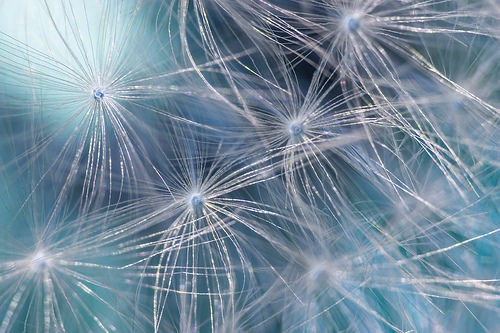

In [ ]:
img

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img, (100, 100)).shape

(100, 100, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (100, 100))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
len(X_train), len(X_test)

(2752, 918)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3739 - loss: 1.3865
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5961 - loss: 1.0095
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6617 - loss: 0.8730
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7446 - loss: 0.6892
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7822 - loss: 0.5870
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8381 - loss: 0.4506
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8650 - loss: 0.3828
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9374 - loss: 0.2203
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9391 - loss: 0.1767
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9577 - loss: 0.1264
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9758 - loss: 0.0999
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9780 - l

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6642 - loss: 2.7124


[2.539999485015869, 0.673202633857727]

In [ ]:
prediction = model.predict(X_test_scaled)
prediction

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[  4.9506664,  10.291839 ,  -3.9176795,  -4.106138 ,  -6.6820564],
       [ -1.1809784,  -8.648144 ,  12.577765 ,  -1.3782539,   5.194705 ],
       [ -7.1759124,  -1.8480029,  23.921164 , -19.858986 ,   0.9035664],
       ...,
       [ -4.252687 , -21.672972 ,  -2.9211254,  24.796988 ,   5.898023 ],
       [ 26.866983 ,   1.6270952, -18.553652 , -22.001333 ,  11.935268 ],
       [ -6.92313  , -24.845278 ,   7.786756 ,  20.340807 ,   8.497685 ]],
      dtype=float32)

In [ ]:
score  = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.7674091e-03, 9.9523133e-01, 6.7113302e-07, 5.5585576e-07,
       4.2291656e-08], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = keras.Sequential(
  [
    RandomFlip("horizontal", input_shape=(100, 100, 3)),
    RandomRotation(0.1),
    RandomZoom(0.2),
  ]
)

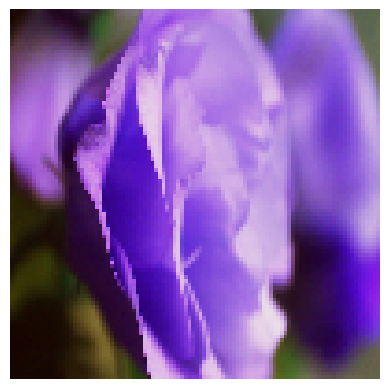

In [ ]:
plt.axis('off')
plt.imshow(X[0])

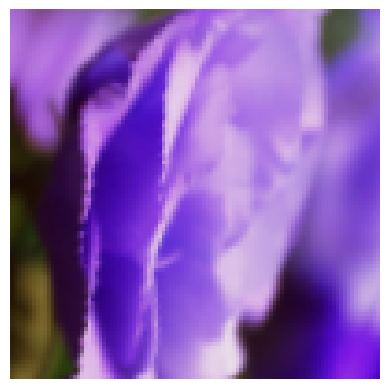

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
plt.show()

### After Augmentation

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3660 - loss: 1.4209
Epoch 2/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5716 - loss: 1.0640
Epoch 3/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6351 - loss: 0.9383
Epoch 4/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6500 - loss: 0.9028
Epoch 5/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6516 - loss: 0.9067
Epoch 6/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7054 - loss: 0.7760
Epoch 7/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7077 - loss: 0.7669
Epoch 8/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6978 - loss: 0.7778
Epoch 9/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7020 - loss: 0.7502
Epoch 10/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7342 - loss: 0.6952
Epoch 11/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7294 - loss: 0.6966
Epoch 12/300
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7016 - loss: 2.3021


[2.0274276733398438, 0.727668821811676]

In [ ]:
# Word Embeddings

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [ ]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])


In [ ]:
one_hot('amazing restaurant',30)

[6, 18]

In [ ]:
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[16, 8],
 [6, 18],
 [9, 13],
 [11, 23, 14],
 [26, 20, 6],
 [27, 8],
 [18, 20, 4],
 [10, 20],
 [10, 8],
 [12, 17]]

In [ ]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
padded_reviews

array([[16,  8,  0,  0],
       [ 6, 18,  0,  0],
       [ 9, 13,  0,  0],
       [11, 23, 14,  0],
       [26, 20,  6,  0],
       [27,  8,  0,  0],
       [18, 20,  4,  0],
       [10, 20,  0,  0],
       [10,  8,  0,  0],
       [12, 17,  0,  0]], dtype=int32)

In [ ]:
embeded_vector_size = 5
model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
X = padded_reviews
y = sentiment

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=50, verbose=0)
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 1.0000 - loss: 0.5177


1.0

In [ ]:
model.get_layer('embedding').get_weights()[0]

array([[ 0.03011807,  0.01072643, -0.00187025, -0.03798731, -0.01091742],
       [ 0.01316222,  0.00248677,  0.00206797, -0.03110268, -0.00517439],
       [-0.04523638,  0.02874596, -0.03920241, -0.04083017,  0.01788855],
       [ 0.00091617,  0.04976373, -0.00144422,  0.00499873, -0.04129159],
       [ 0.09398368,  0.04178745, -0.00878475, -0.09554503, -0.06084189],
       [ 0.00893683, -0.04794751,  0.02279974, -0.01335733, -0.04172951],
       [-0.03628643, -0.07597229,  0.11753173,  0.06030566,  0.04516236],
       [-0.00831224,  0.03098777, -0.04653544,  0.02963806,  0.02239137],
       [ 0.00657654,  0.05935568,  0.04879944,  0.07746223,  0.02585741],
       [ 0.09763558, -0.09917475,  0.01554153,  0.05426892,  0.08335813],
       [-0.05539449,  0.09051089, -0.08756806, -0.10844062, -0.10386308],
       [ 0.07926996, -0.02670899,  0.06691334,  0.03647453,  0.02589897],
       [-0.02596184,  0.00795624, -0.07138204, -0.0180824 , -0.06739387],
       [-0.03888821, -0.06106754, -0.0

In [1]:
import gensim
import requests
import gzip
import io
import pandas as pd

In [3]:
dataset_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz"

r = requests.get(dataset_url)
with gzip.GzipFile(fileobj=io.BytesIO(r.content)) as gz:
  data = gz.read()

df = pd.read_json(io.BytesIO(data), lines=True)
print(df.head())

       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                         

In [6]:
df.reviewText

,reviewText
0,They look good and stick good! I just don't li...
1,These stickers work like the review says they ...
2,These are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...
4,"awesome! stays on, and looks great. can be use..."
...,...
194434,Works great just like my original one. I reall...
194435,Great product. Great packaging. High quality a...
194436,"This is a great cable, just as good as the mor..."
194437,I really like it becasue it works well with my...


In [5]:
df.shape

(194439, 9)

In [7]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

### Preprocessing

In [8]:
gensim.utils.simple_preprocess("They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again")

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [9]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [10]:
review_text

,reviewText
0,"[they, look, good, and, stick, good, just, don..."
1,"[these, stickers, work, like, the, review, say..."
2,"[these, are, awesome, and, make, my, phone, lo..."
3,"[item, arrived, in, great, time, and, was, in,..."
4,"[awesome, stays, on, and, looks, great, can, b..."
...,...
194434,"[works, great, just, like, my, original, one, ..."
194435,"[great, product, great, packaging, high, quali..."
194436,"[this, is, great, cable, just, as, good, as, t..."
194437,"[really, like, it, becasue, it, works, well, w..."


In [11]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [12]:
model.build_vocab(review_text, progress_per=1000)

In [13]:
model.train(
    review_text,
    total_examples=model.corpus_count,
    epochs=model.epochs,
)

(61506622, 83868975)

In [13]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

In [14]:
model.wv.most_similar("bad")

[('terrible', 0.6707372069358826),
 ('shabby', 0.6114408373832703),
 ('horrible', 0.5996299386024475),
 ('good', 0.592508852481842),
 ('okay', 0.541380763053894),
 ('legit', 0.5325579047203064),
 ('awful', 0.5307465195655823),
 ('poor', 0.5181787610054016),
 ('pathetic', 0.5108936429023743),
 ('ok', 0.5106428861618042)]

In [15]:
model.wv.similarity(w1="cheap", w2="inexpensive")

0.5285048